# Force and temperature curves for adhesive cycle of Gallium

In [1]:
#%reset
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import cv2 as cv2
from PIL import Image
import matplotlib.widgets as widgets
import pandas as pd
import obspy.signal.filter
import os

%matplotlib notebook

In [2]:
#The following function enables the opening of a pop up window that lets
#the user choose a video file

def openfile_dialog():
    from PyQt5 import QtGui
    
    from PyQt5 import QtGui, QtWidgets
    app = QtWidgets.QApplication([dir])
    fname = QtWidgets.QFileDialog.getOpenFileName(None, directory= os.getcwd(), caption = "Select a video file...",
                                                  filter="All files (*)")
    return fname[0]

### Force curve

In [3]:
#Selection of the force curve file

file = openfile_dialog()
print(file)

C:/Users/alien/Dropbox/Data/12SEP/12SEP2018_Ga_Post_PreL10mN_DT20s_CavD3mm_2thermocoupledFreq_13_ver1-voltage.txt


<IPython.core.display.Javascript object>


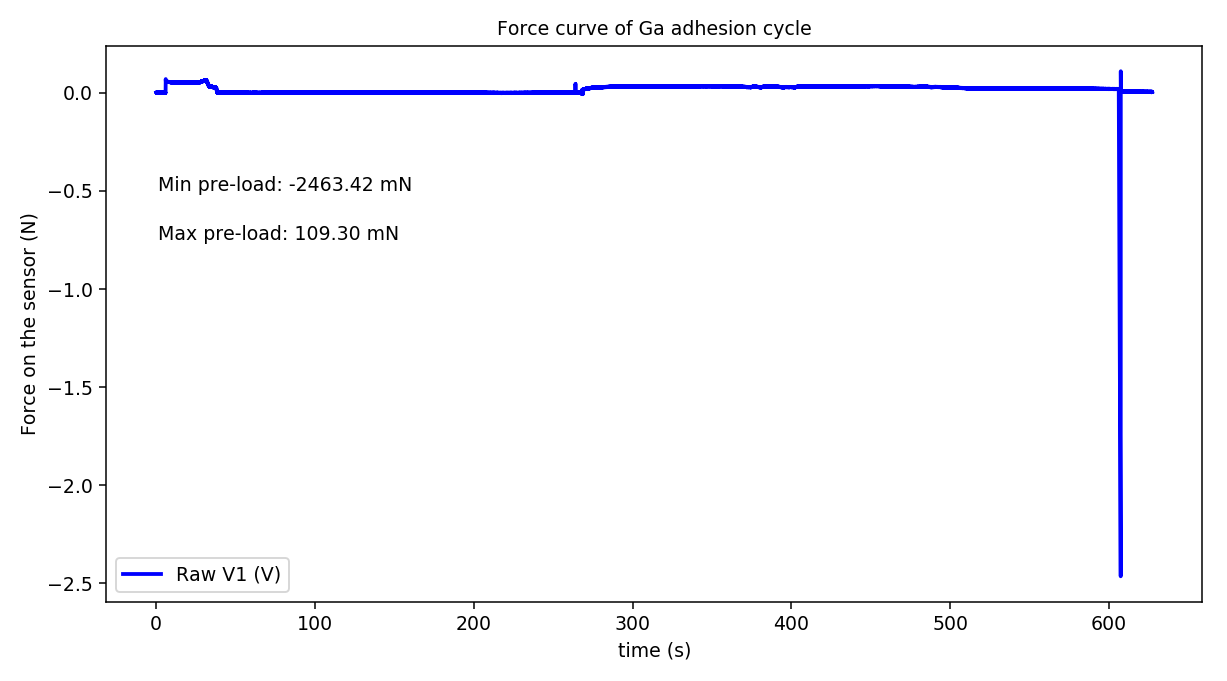

In [4]:
fsz = (9, 5) #figure size
FS = 10 #font size

table = pd.read_csv(file, sep = "\t", skiprows = 3) #read the force curve file
headers = list(table)

time = table[headers[0]]/(1000) #conversion from ms to s
force = table[headers[1]]/1.0568 #Load-cell convertion (Volts to Newtons)
force_mean = force-force[50:60].mean() #position zero of the force curve

filt = obspy.signal.filter.lowpass(force_mean, 10, 1000) #remove the high frequencies (noise)


fig, ax1 = plt.subplots(figsize = fsz)
maxi = np.max(force_mean)*1000 #print in mN
mini = np.min(force_mean)*1000 #print in mN
ax1.text(1,-0.75,'Max pre-load: %0.2f mN' %maxi, fontsize = FS) #show max on the plot
ax1.text(1,-0.5,'Min pre-load: %0.2f mN' %mini, fontsize = FS) #show min on the plot
color = 'tab:red'
ax1.set_xlabel('time (s)', fontsize = FS)
ax1.set_ylabel('Force on the sensor (N)',fontsize = FS)
plt.plot(time, force_mean, color = 'blue', linewidth = 2)
ax1.tick_params(labelsize = FS)


plt.title("Force curve of Ga adhesion cycle", fontsize = FS)
plt.legend(fontsize = FS)

fig.tight_layout()
plt.show()


In [49]:
plt.savefig(file[:-4] + '_begin.tiff')

-2.4637721990915975
0.10895017032551091


### Temperature curves

In [5]:
#Selection of the temperature curves files
temperature = openfile_dialog()
print(temperature)

C:/Users/alien/Dropbox/Data/Temperature/18-09-12/DA-13-17.csv


<IPython.core.display.Javascript object>


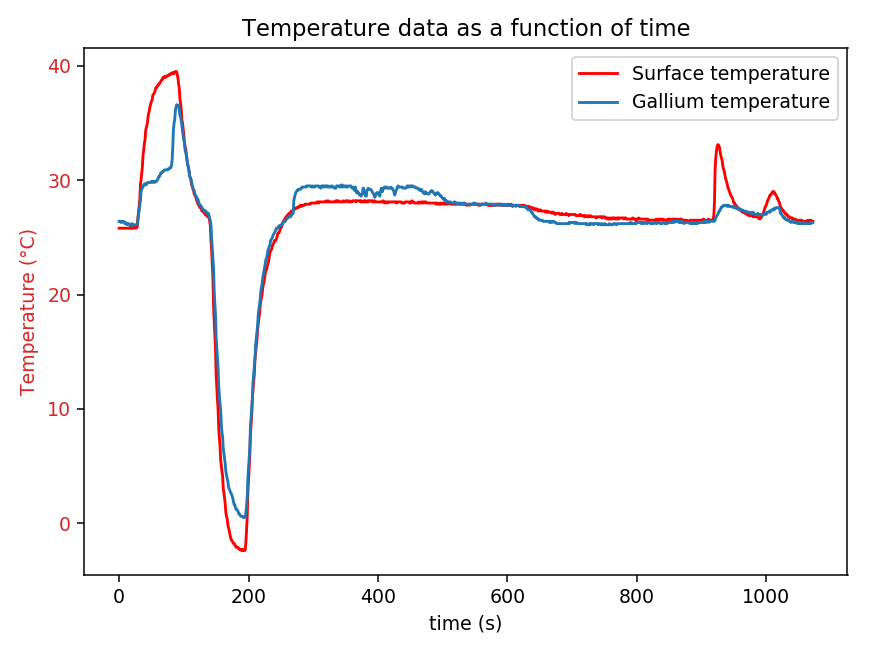

In [6]:
table2 = pd.read_csv(temperature, sep = ",", skiprows = [0,1,3]) #read force data
headers2 = list(table2)

time2 = table2[headers2[1]] #time data
tem = table2[headers2[2]] #substrate temperature
tem_subs = table2[headers2[3]] #Gallium temperature

fig, ax1 = plt.subplots()

d = 0
time2 = [t + d for t in time2] #To plot from d instead of from 0
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Temperature (°C)', color=color)
plt.plot(time2, tem, color = 'red', label = "Surface temperature")

ax1.tick_params(axis='y', labelcolor=color)

tem_subs = [float(tem_subs[i][2:]) for i in range(tem_subs.shape[0]-1)] #make the data readable for numpy

plt.plot(tem_subs, label = "Gallium temperature")


plt.title('Temperature data as a function of time')
plt.legend()

fig.tight_layout()
#plt.show()


In [9]:
plt.savefig(file[:-4] + '_2temps.tiff')

## Combined plot

<IPython.core.display.Javascript object>


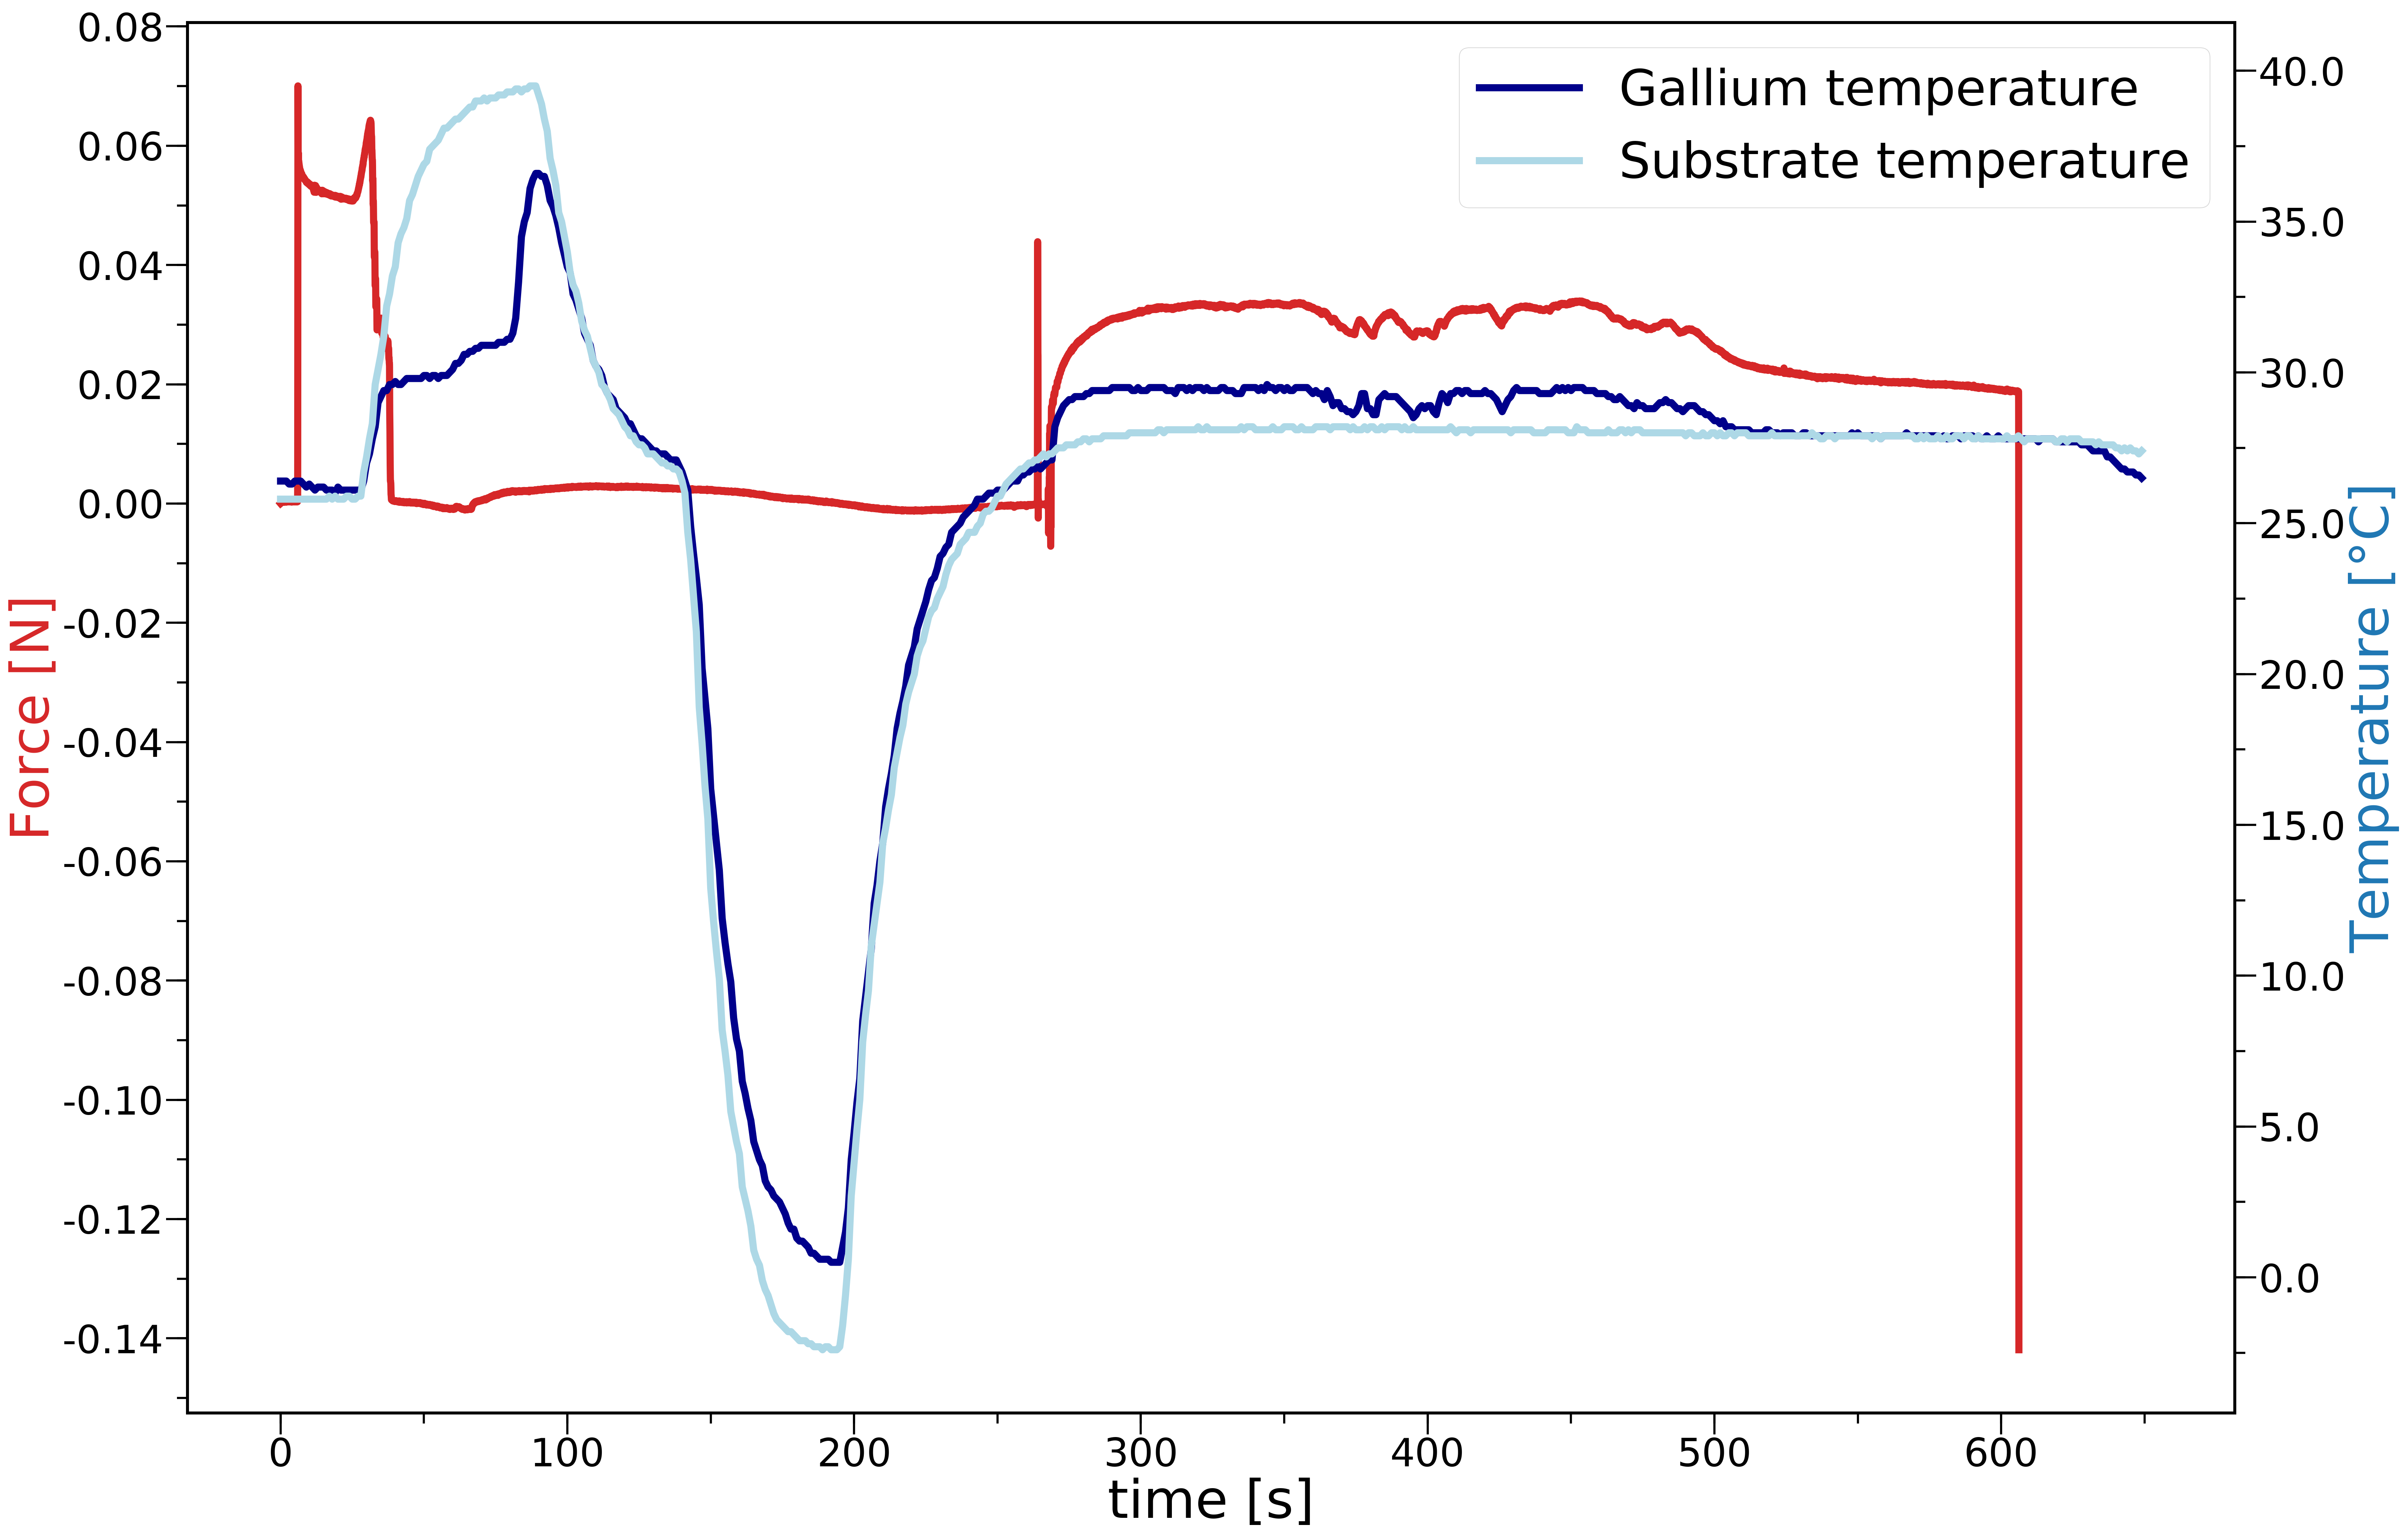

In [21]:
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
mpl.rcParams['axes.linewidth'] = 4 #set the value globally

fsz2 = (47, 30) #figure size
FS2 = 70 #fontsize
fig, ax1 = plt.subplots(figsize = fsz2)
lw = 10
deb = 0
fin =472227 #Chosen in order to align the 2 curves, only for esthetics


majorLocator = MultipleLocator(0.02)
majorFormatter = FormatStrFormatter('%.2f')
minorLocator = MultipleLocator(0.01)


ax1.yaxis.set_major_locator(majorLocator)
ax1.yaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
ax1.yaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(100)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(50)


ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
ax1.xaxis.set_minor_locator(minorLocator)

color = 'tab:red'
ax1.set_xlabel('time [s]', fontsize = FS2+5)
ax1.set_ylabel('Force [N]', color=color, fontsize = FS2+5)
plt.plot(time[deb:fin], filt[deb:fin], color = color, linewidth = lw, label = 'Force sensor')


ax1.tick_params(labelsize = FS2-15, length = 30, which = 'major', width = 3)
ax1.tick_params(labelsize = FS2-15, length = 15, which ='minor', width = 3) 


majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%.1f')
minorLocator = MultipleLocator(2.5)

ax2 = ax1.twinx()  # second axis on the right


ax2.yaxis.set_major_locator(majorLocator)
ax2.yaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
ax2.yaxis.set_minor_locator(minorLocator)

ax2.tick_params(labelsize = FS2-15, length = 30, which = 'major', width = 3)
ax2.tick_params(labelsize = FS2-15, length = 15, which ='minor', width = 3) 



color = 'tab:blue'
ax2.set_ylabel('Temperature [°C]', color=color, fontsize = FS2+5)
ND = 650
plt.plot(time2[:ND], tem_subs[0:ND], color = 'darkblue', linewidth = lw, label = 'Gallium temperature')
plt.plot(time2[:ND], tem[0:ND], color = 'lightblue', linewidth = lw, label = 'Substrate temperature')
plt.legend(prop={'size': FS2})

#plt.title('Retraction of the contact edge during the pull-off phase of an adhesion test on glass ', fontsize = FS2 +5 )
ax2.tick_params(labelsize = FS2-15)

fig.tight_layout()

plt.show()


In [22]:
plt.savefig(file[:-4] + '_temp_force_test.tiff')